In [1]:
### importing Intial libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import xgboost as xgb

%pylab inline
pd.options.display.max_columns=100
pd.options.display.max_rows=15

os.chdir("D:\\analytixlabs\\Complete_datasets")
print os.getcwd() 
Telecom=pd.read_csv("Proactive Attrition Management-Logistic Regression Case Study.csv")
#Telecom.head()

Populating the interactive namespace from numpy and matplotlib
D:\analytixlabs\Complete_datasets


In [2]:
Val_Telecom=Telecom.loc[Telecom.CHURNDEP.isnull()]
TT_Telecom=Telecom.loc[Telecom.CHURNDEP.isin([0,1])]
print Val_Telecom.shape
print TT_Telecom.shape

def missing(x):
    return sum(x.isnull())
#print "Missing values per column:"
#TT_Telecom.loc[ : ,TT_Telecom.apply(missing, axis=0)!=0]

(31047, 78)
(40000, 78)


In [3]:
#removing these 2 columns will give us the base model with any NAs['CALIBRAT' ,'CALLFWDV' ,'CALLWAIT',]
from warnings import WarningMessage,filterwarnings
#removing targrt leaks:
TT_Telecom.drop(labels=['CHURN','RETCALL','RETCALLS','RETACCPT'],inplace=True,axis=1)
#MAILORD is coliner with MAILRES,PHONES-Model,MOUREC-MOU,OWNRENT-CREDITCD,BLCKVCE	DROPBLK,

#removing Other colinear colums
TT_Telecom.drop(labels=['CSA','CALIBRAT' ,'CALLFWDV' ,'CALLWAIT','MODELS','MOUREC','CUSTOMER',
                        'BLCKVCE','DROPBLK','INCMISS','OWNRENT','OVERAGE','UNIQSUBS','AGE2','PEAKVCE','OPEAKVCE','REFURB','TRUCK'
                        ,'RV','MARRYUN','MAILORD','PCOWN','NEWCELLN','MCYCLE','REVENUE','MAILFLAG','CHANGER','OUTCALLS'],inplace=True,axis=1)
TT_Telecom.dropna(subset=['AGE1','CHANGEM'],inplace=True)

#CSA cant be identified so we we will keep them as missing
#TT_Telecom.CSA.fillna('Missing',inplace=True)

C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [63]:
from sklearn.cluster import KMeans,DBSCAN
kmeans = KMeans(n_clusters=3, random_state=42)

labels=kmeans.fit(TT_Telecom)

CLUSTERED=TT_Telecom
CLUSTERED['cluster']=list(labels.labels_)
CLUSTERED.head()

C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,MOU,RECCHRGE,DIRECTAS,ROAM,CHANGEM,DROPVCE,UNANSVCE,CUSTCARE,THREEWAY,INCALLS,MONTHS,ACTVSUBS,PHONES,EQPDAYS,AGE1,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,WEBCAP,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,MARRYYES,MARRYNO,MAILRES,TRAVEL,CREDITCD,NEWCELLY,REFER,INCOME,CREDITAD,SETPRCM,SETPRC,CHURNDEP,cluster
31047,7.50,38.00,0.00,0.0,-1.50,0.00,0.0,0.00,0.00,0.00,60,1,1.0,1812.0,26.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,6,0,1,0.00,0.0,0
31048,570.50,71.98,0.00,0.0,38.50,9.67,77.0,8.67,0.00,0.67,57,1,6.0,434.0,56.0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,6,2,0,79.99,0.0,1
31049,682.50,52.49,0.25,0.0,147.50,9.00,13.0,0.67,0.00,0.00,53,1,3.0,231.0,28.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,1,0,29.99,0.0,1
31050,1039.00,50.00,4.95,0.0,198.00,12.67,176.0,11.33,0.33,0.33,55,1,3.0,700.0,38.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,4,3,0,9.99,0.0,1
31051,24.25,34.98,0.00,0.0,19.75,0.00,1.0,0.00,0.00,1.67,53,3,4.0,544.0,36.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,9,0,0,79.99,0.0,0


In [61]:
#TT_Telecom.cluster.value_counts()

TT_Telecom.pivot_table(index=['cluster'], values=['CHURNDEP'],aggfunc='mean')






,CHURNDEP
cluster,
0,0.521531
1,0.464126
2,0.441063


In [64]:
cluster_0=TT_Telecom[TT_Telecom.cluster==0]
cluster_0.drop('cluster',inplace=True,axis=1)
cluster_1=TT_Telecom[TT_Telecom.cluster==1]
cluster_1.drop('cluster',inplace=True,axis=1)
cluster_2=TT_Telecom[TT_Telecom.cluster==2]
cluster_2.drop('cluster',inplace=True,axis=1)
cluster_1.head()


C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,MOU,RECCHRGE,DIRECTAS,ROAM,CHANGEM,DROPVCE,UNANSVCE,CUSTCARE,THREEWAY,INCALLS,MONTHS,ACTVSUBS,PHONES,EQPDAYS,AGE1,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,WEBCAP,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,MARRYYES,MARRYNO,MAILRES,TRAVEL,CREDITCD,NEWCELLY,REFER,INCOME,CREDITAD,SETPRCM,SETPRC,CHURNDEP
31048,570.50,71.98,0.00,0.0,38.50,9.67,77.00,8.67,0.00,0.67,57,1,6.0,434.0,56.0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,6,2,0,79.99,0.0
31049,682.50,52.49,0.25,0.0,147.50,9.00,13.00,0.67,0.00,0.00,53,1,3.0,231.0,28.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,1,0,29.99,0.0
31050,1039.00,50.00,4.95,0.0,198.00,12.67,176.00,11.33,0.33,0.33,55,1,3.0,700.0,38.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,4,3,0,9.99,0.0
31052,1056.25,75.00,0.00,0.0,42.75,0.00,0.00,0.00,0.00,0.00,55,1,9.0,388.0,46.0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,5,1,0,29.99,0.0
31057,1293.25,67.75,0.00,0.0,446.75,6.67,39.33,3.33,0.00,6.33,55,2,4.0,20.0,64.0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,9,1,0,29.99,0.0


In [65]:
X=TT_Telecom.ix[:,TT_Telecom.columns != 'CHURNDEP']
y=TT_Telecom.CHURNDEP
#X_test=Val_Telecom.ix[:,:-1]
#y_test=Val_Telecom.CHURNDEP


Optimal number of features : 1


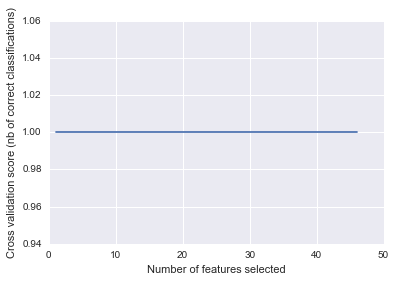

In [67]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Create the RFE object and compute a cross-validated score.
adb = AdaBoostClassifier()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=adb, step=1, cv=StratifiedKFold(y_train, 2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [70]:
print rfecv.ranking_


[ 5  2 24 16  1  6 22 15 26 10  3  9 20  4  8 14 42 34 36 13 12 44 46 45 17
 23 18 30 32 27 35 37 38 39 40 19 11 33 31 41 25 28 29 21  7 43]


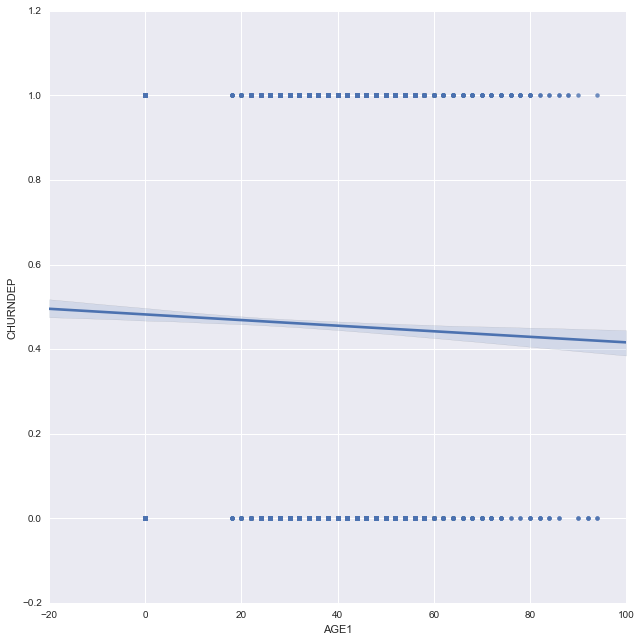

In [45]:
sns.lmplot(x='AGE1',y='CHURNDEP',data=cluster_1,logistic=True,size=9)

[ 68.81  85.  ]


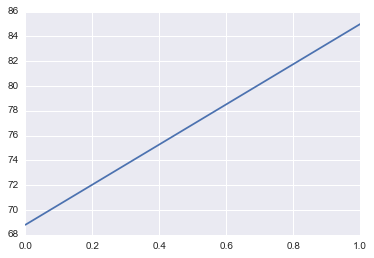

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#Scaling the values
#X = scale(standardisedX)

pca = PCA(n_components=2)
pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print var1

plt.plot(var1)

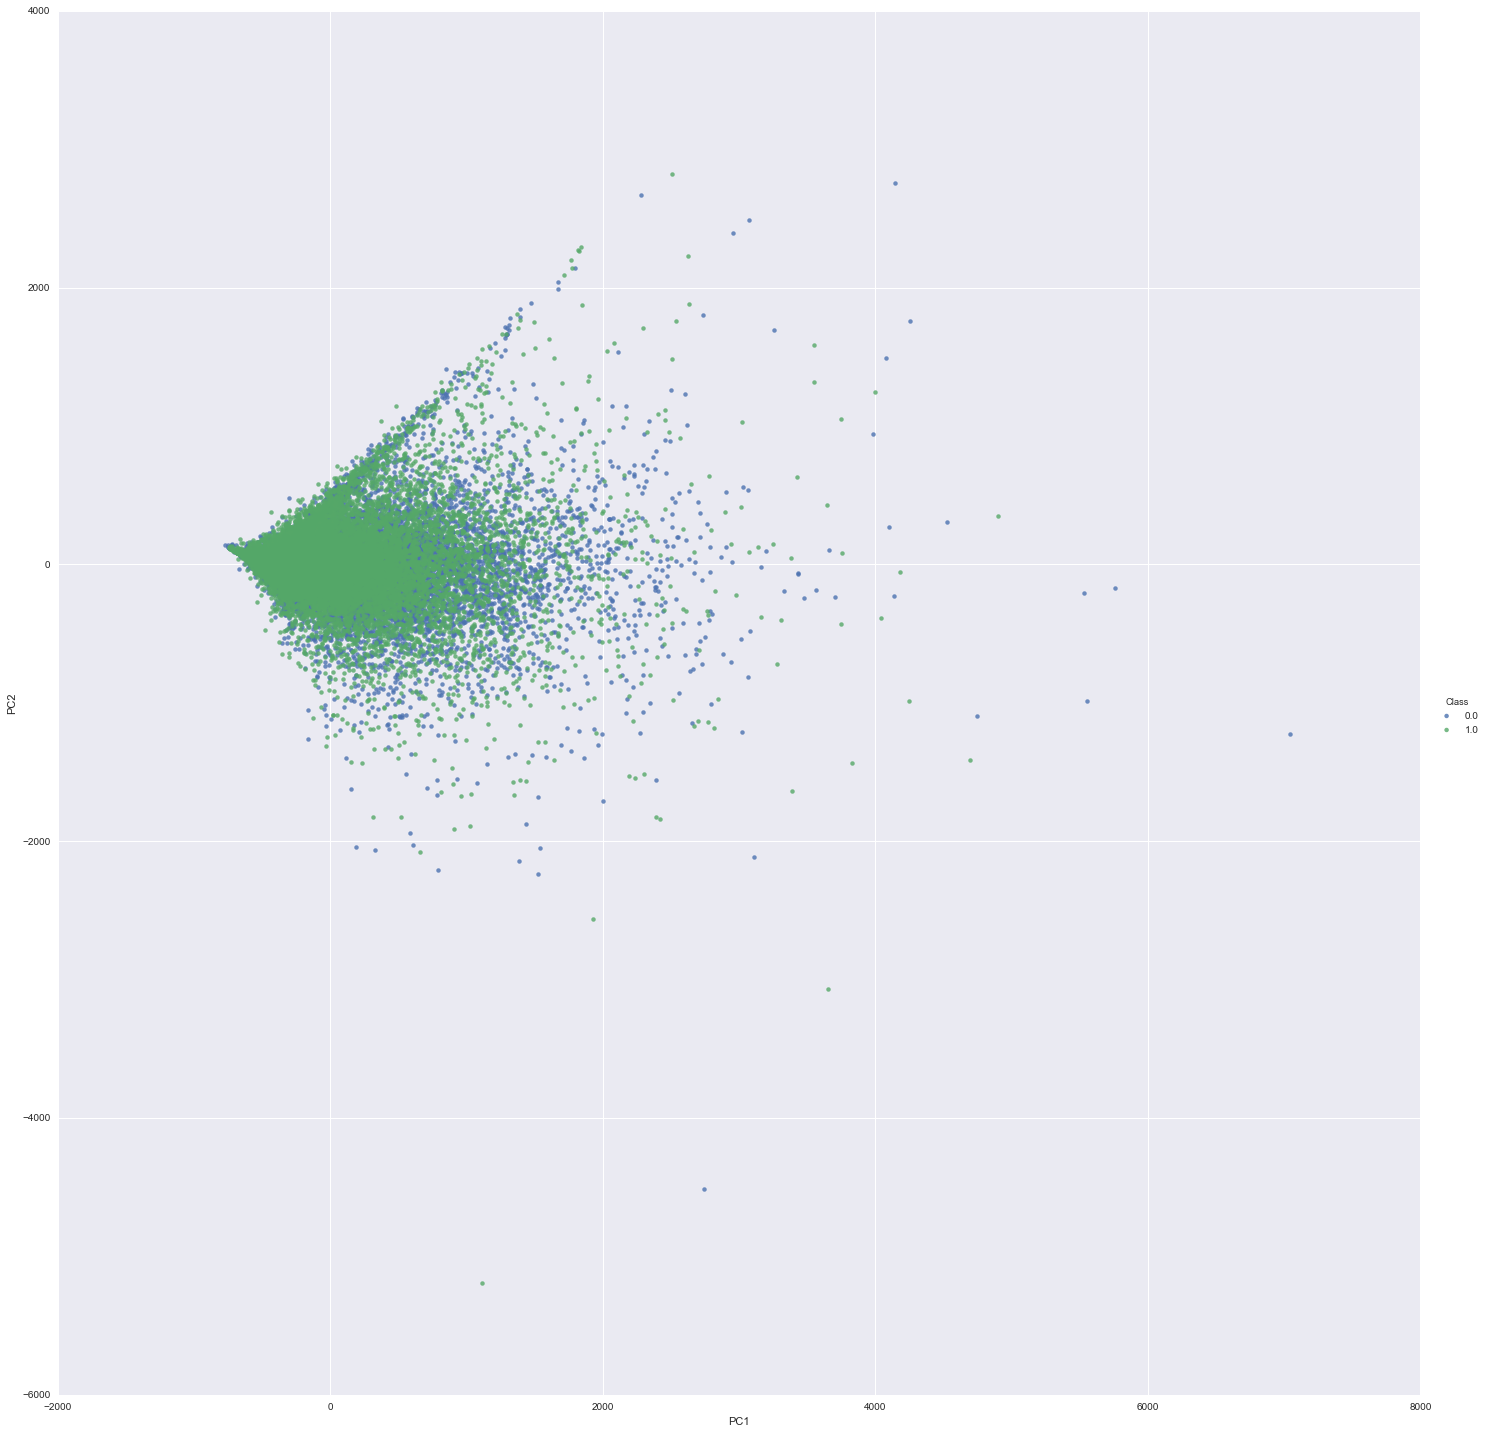

In [48]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class",size=20, fit_reg=False)

pca_scatter(pca, X, y)